Index[0]Week #
Index[1]Day of Week
Index[2]Backup Start Time - Hour of Day
Index[3]Work-Flow-ID
Index[4]File Name
Index[5]Size of Backup (GB)
Index[6]Backup Time (hour)


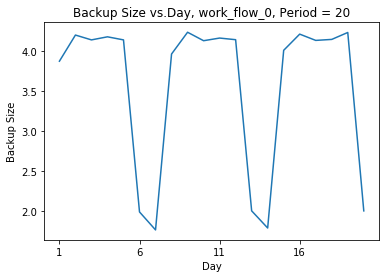

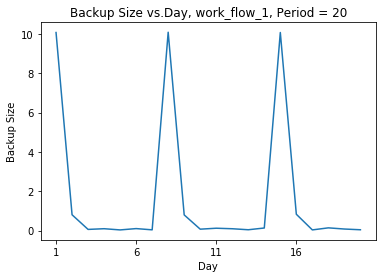

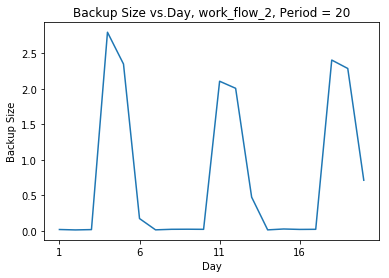

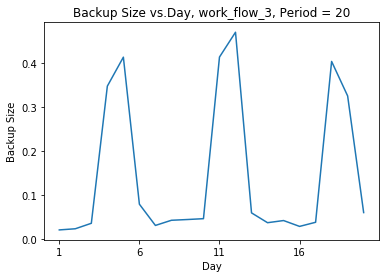

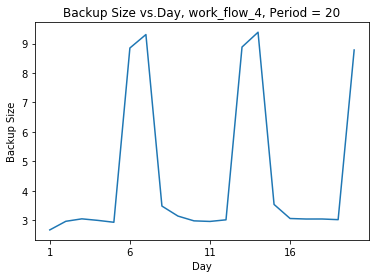

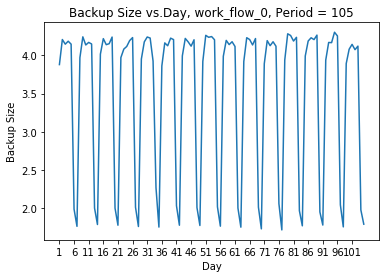

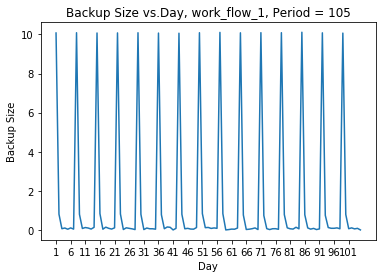

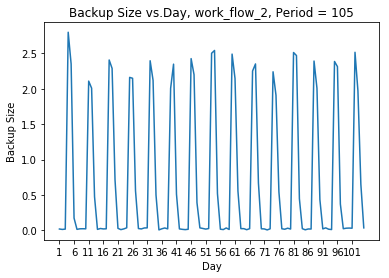

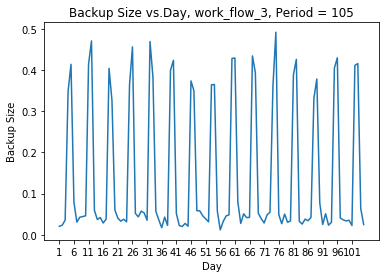

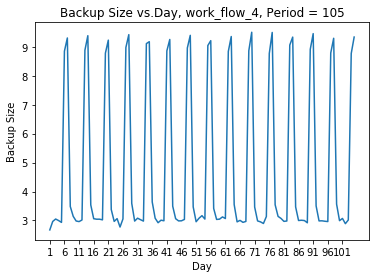

In [170]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

input_file = "network_backup_dataset.csv"

dataset = pd.read_csv(input_file, header = 0)
labels = dataset.columns
for i, v in enumerate(labels):
    print "Index[" + str(i) + "]" + v
    
data_array = dataset.iloc[:,:].values

daily_info = dict()

#Number of rows
i=0;

for week in data_array[:,0]:
    key = "Week"+ str(week) + "_" + data_array[i,1] + "_" + data_array[i,3]
    if key not in daily_info:
        daily_info[key] = data_array[i,5]
        
    else:
        daily_info[key] += data_array[i,5]
        
    i=i+1
    

#NO. of week & name of day & name of work_flow
no_week = np.unique(data_array[:,0])
name_day = ["Monday","Tuesday","Wednesday","Thursday","Friday","Saturday","Sunday"]
name_wf = np.unique(data_array[:,3])

#Construct dict work_flow vs daily info
wf_daily_info = dict()

for wf in name_wf:
    
    key = wf
    
    if key not in wf_daily_info:
        wf_daily_info[key] = []
        
    for i in no_week:
        for day in name_day:
            key_2 = "Week" + str(i) + "_" + day + "_" + wf
            wf_daily_info[key].append(daily_info[key_2])
            
#Function for different work flow in different time period 

def compute_size (work_flow,period):
    x = range(1,period+1)
    y = wf_daily_info[work_flow][:period]
    
    plt.title("Backup Size vs.Day, " + work_flow + ", Period = " + str(period))
    plt.xlabel("Day")
    plt.ylabel("Backup Size")
    plt.xticks(np.arange(min(x), max(x)+1, 5.0))
    plt.plot(x,y)
    plt.show()

#Problem 1 (a)

#Compute 
for wf in name_wf:
    compute_size (wf,20)
    
#Problem 1 (b)

for wf in name_wf:
     compute_size (wf,105)

        





